In [1]:
import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
labels=["truncated_1000cells_FPCD.hdf5"]
data_path = "./"

In [3]:
#print(int(0.7*ntotal))

In [4]:
#ntotal

In [10]:
for label in labels:
#if 'w' in label or 'z' in label: continue #no evaluation for w and z
    with h5.File(os.path.join(data_path,label),"r") as h5f:
        ntotal = h5f['cluster'][:].shape[0]
        particle = h5f['hcal_cells'][int(0.7*ntotal):int(0.7*ntotal)+2,:-10,2:].astype(np.float32)
        print(f"SimpleLoader File {label}, Particle = ",particle)
        inpX = np.ravel(h5f['hcal_cells'][:100,:-10,1].astype(np.float32))

SimpleLoader File truncated_1000cells_FPCD.hdf5, Particle =  [[[-9.0000e+02  3.8215e+03  1.0000e+00]
  [-9.0000e+02  3.8449e+03  1.0000e+00]
  [-9.0000e+02  3.8683e+03  1.0000e+00]
  ...
  [ 0.0000e+00  0.0000e+00  0.0000e+00]
  [ 0.0000e+00  0.0000e+00  0.0000e+00]
  [ 0.0000e+00  0.0000e+00  0.0000e+00]]

 [[-1.2000e+03  3.8215e+03  1.0000e+00]
  [-1.2000e+03  3.8449e+03  1.0000e+00]
  [-1.3000e+03  3.9619e+03  1.0000e+00]
  ...
  [ 0.0000e+00  0.0000e+00  0.0000e+00]
  [ 0.0000e+00  0.0000e+00  0.0000e+00]
  [ 0.0000e+00  0.0000e+00  0.0000e+00]]]


In [6]:
with h5.File("../GSGM_bigMay10.h5","r") as h5f:
    ntotal = h5f['jet_features'][:].shape[0]
    particle = h5f['particle_features'][-1,:10,:4].astype(np.float32)
    print(f"SimpleLoader File {label}, Particle = ",particle)
    genX = np.ravel(h5f['particle_features'][:100,:,1].astype(np.float32))

SimpleLoader File truncated_1000cells_FPCD.hdf5, Particle =  [[ 6.3551770e-04 -2.7000054e+03  2.6000054e+03 -5.0851102e-03]
 [ 1.5162298e-04  2.6000054e+03  2.6000054e+03  5.0851050e+03]
 [ 6.7609799e-04 -2.7000054e+03  2.6000054e+03  5.0851050e+03]
 [ 1.4363074e-04  2.6000054e+03  2.6000054e+03            nan]
 [ 6.9012889e-04  2.5264617e+03  2.6000054e+03            nan]
 [ 5.9546001e-04 -2.7000054e+03 -2.7000054e+03            nan]
 [ 7.9333171e-04  2.6000054e+03 -2.7000054e+03 -5.0851102e-03]
 [ 4.3361512e-04  2.6000054e+03  2.6000054e+03 -5.0851102e-03]
 [ 2.2623796e-04  2.6000054e+03 -2.7000054e+03  5.0851050e+03]
 [ 1.5450208e-04  2.6000054e+03 -2.7000054e+03  5.0851050e+03]]


(array([1245., 1359., 1896., 1920., 2325., 2175.,  363.,  100.,   31.,
          13.]),
 array([ 100.,  320.,  540.,  760.,  980., 1200., 1420., 1640., 1860.,
        2080., 2300.], dtype=float32),
 <BarContainer object of 10 artists>)

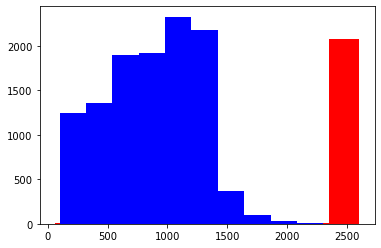

In [7]:
plt.hist(genX[genX>0.001],label="genX",color="red")
plt.hist(inpX[inpX>0.001],label="inputX",color="blue")